# Double Q Learning for Taxi-v3 environment

In [16]:
#!apt-get install --assume-yes ffmpeg freeglut3-dev xvfb  # For visualization
#!pip install stable-baselines3[extra]
import torch
import gym

# Double Q Learning Agent

In [17]:
env = gym.make('Taxi-v3')


def epsilon_greedy(n_action, epsilon):
    def policy_function(state, Q):
        probs = torch.ones(n_action) * epsilon / n_action
        best_action = torch.argmax(Q[state]).item()
        probs[best_action] += 1.0 - epsilon
        action = torch.multinomial(probs, 1).item()
        return action
    return policy_function

def double_q_learning(env, gamma, n_episode, alpha):
    n_action = env.action_space.n
    n_state = env.observation_space.n
    # tabular Q learning
    Q1 = torch.zeros(n_state, n_action)
    Q2 = torch.zeros(n_state, n_action)
    for episode in range(n_episode):
        
        state = env.reset()
        is_done = False
        
        while not is_done:
            action = epsilon_greedy_policy(state, Q1 + Q2)
            next_state, reward, is_done, info = env.step(action)
            if (torch.rand(1).item() < 0.5):
                best_next_action = torch.argmax(Q1[next_state])
                td_delta = reward + gamma * Q2[next_state][best_next_action] - Q1[state][action]
                Q1[state][action] += alpha * td_delta
                
            else:
                best_next_action = torch.argmax(Q2[next_state])
                td_delta = reward + gamma * Q1[next_state][best_next_action] - Q2[state][action]
                Q2[state][action] += alpha * td_delta
                
            length_episode[episode] += 1
            total_reward_episode[episode] += reward
            if is_done:
                break
                
            state = next_state
            
    policy = {}
    Q = Q1 + Q2
    for state in range(n_state):
        policy[state] = torch.argmax(Q[state]).item()
    return Q, policy

gamma = 1
n_episode = 3000
alpha = 0.4
epsilon = 0.1
epsilon_greedy_policy = epsilon_greedy(env.action_space.n, epsilon)

length_episode = [0] * n_episode
total_reward_episode = [0] * n_episode

optimal_Q, optimal_policy = double_q_learning(env, gamma, n_episode, alpha)

# Plot rewards 

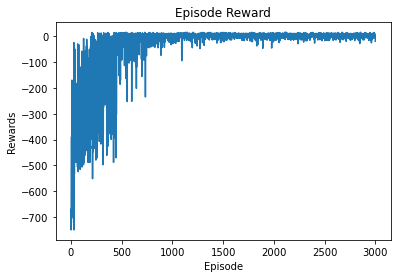

In [18]:
import matplotlib.pyplot as plt

plt.plot(total_reward_episode)
plt.title('Episode Reward')
plt.xlabel('Episode')
plt.ylabel('Rewards')
plt.show()

# Demonstration of final policy

In [19]:
env = gym.make('Taxi-v3')
state = env.reset()

for _ in range(1000):
    action = optimal_policy[state]
    state, reward, is_done, info = env.step(action)
    env.render()
    
    if is_done:
        break
    
env.close()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
+---------+
|R: | : :G|
| : | : :_|
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | :_: |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : | : : |
| : : :_: |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : :_: : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : | : : |
| :_: : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : | : : |
|_: : : : |
| | : | : |
|Y| 